# **Ch 1 - Intorduction**

Reza Febian Agassi

RMT-040

### **Netflix Customer Churn Prediction**

In the highly competitive landscape of subscription-based streaming services, customer retention is crucial for sustained business growth. Customer churn, the phenomenon where users cancel their subscriptions, directly impacts revenue, profitability, and market share. With the increasing presence of alternative streaming platforms and shifting viewer preferences, it is essential for companies like Netflix to understand why customers leave and proactively address churn risk.

Derived from that problem, we developed a machine learning model to predict customer churn based on various factors such as user engagement, payment history, and demographic information. This project utilizes the Netflix Engagement Dataset sourced from Kaggle to analyze and classify customer churn patterns. By identifying high-risk customers early, Netflix or other subscription-based platforms can implement targeted retention strategies, including personalized recommendations, exclusive content, special discounts, or improved customer support.

For this study, churn labels are defined as follows:

0 = No Churn (Customer remains subscribed)

1 = Churn (Customer cancels subscription)

To evaluate the model's effectiveness, we prioritize **recall** as the primary performance metric. This is to minimize false negatives, ensuring that customers who are actually at risk of churning are correctly identified. By emphasizing recall, we reduce the chances of misclassifying a high-risk customer as a retained one, allowing businesses to take proactive retention measures before they cancel their subscription.


**Key Objectives:**

1. **Predict** churn likelihood based on customer engagement (watch time, satisfaction, queries.).

2. **Identify** key churn factors, such as subscription length, payment history, and device usage.

3. **Develop** a robust classification models using machine learning techniques (K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, and Gradient Boosting).

4. **Optimize** model performance through feature engineering and hyperparameter tuning.

5. **Provide actionable** insights for improving customer retention strategies.

# **Ch 2 - Import Libraries**

First, we import all necessary libraries that we need to develop for the machine learning models in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


# **Ch 3 - Data Loading**

After importing all the necessary libraries, the next step is to load the dataset and analyze it to gain a better understanding of its structure and contents.

In [2]:
# Load Netflix Engagement Dataset
df = pd.read_csv('Netflix Engagement Dataset.csv')
df .T


,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
Customer ID,1,2,3,4,5,6,7,8,9,10,...,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500
Subscription Length (Months),50,40,17,59,5,1,19,59,37,53,...,31,56,57,54,26,20,56,52,34,6
Customer Satisfaction Score (1-10),10,5,8,10,7,7,9,8,4,8,...,2,7,7,5,9,4,8,7,5,5
Daily Watch Time (Hours),4.32,4.45,4.81,2.67,4.2,2.99,2.8,5.51,2.2,3.05,...,5.42,4.53,4.41,1.55,3.49,4.82,4.48,4.43,1.11,4.34
Engagement Rate (1-10),8,3,8,10,9,8,8,9,5,9,...,6,7,8,6,7,6,7,8,3,3
Device Used Most Often,Mobile,Smart TV,Laptop,Mobile,Smart TV,Laptop,Laptop,Laptop,Mobile,Tablet,...,Tablet,Laptop,Laptop,Laptop,Laptop,Laptop,Mobile,Tablet,Smart TV,Mobile
Genre Preference,Romance,Comedy,Sci-fi,Action,Sci-fi,Romance,Sci-fi,Drama,Drama,Romance,...,Sci-fi,Romance,Sci-fi,Comedy,Action,Sci-fi,Romance,Sci-fi,Romance,Comedy
Region,Oceania,Asia,South America,Africa,North America,Africa,South America,Africa,Asia,North America,...,Oceania,Africa,North America,Oceania,Africa,Asia,Africa,Oceania,Asia,North America
Payment History (On-Time/Delayed),On-Time,On-Time,On-Time,On-Time,On-Time,On-Time,Delayed,On-Time,On-Time,On-Time,...,Delayed,On-Time,On-Time,On-Time,On-Time,On-Time,On-Time,On-Time,On-Time,On-Time
Subscription Plan,Premium,Premium,Basic,Basic,Standard,Basic,Standard,Basic,Standard,Basic,...,Premium,Basic,Basic,Basic,Basic,Premium,Basic,Standard,Basic,Basic


The data has 3500 entries and 16 features including 1 target Churn Status column.

Next is to explore more about the dataset structure.




In [3]:
# Check dataset structure
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (3500, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         3500 non-null   int64  
 1   Subscription Length (Months)        3500 non-null   int64  
 2   Customer Satisfaction Score (1-10)  3500 non-null   int64  
 3   Daily Watch Time (Hours)            3500 non-null   float64
 4   Engagement Rate (1-10)              3500 non-null   int64  
 5   Device Used Most Often              3500 non-null   object 
 6   Genre Preference                    3500 non-null   object 
 7   Region                              3500 non-null   object 
 8   Payment History (On-Time/Delayed)   3500 non-null   object 
 9   Subscription Plan                   3500 non-null   object 
 10  Churn Status (Yes/No)               3500 non-null   object 
 11  Support Queries L

### **Key Observations:**
- The dataset has **3,500 rows and 16 columns**.
- It contains **both numerical and categorical features**.
- No missing values.
- The target variable for churn prediction is **"Churn Status (Yes/No)"**.

# **Ch 4 - Exploratory Data Analysis**

In this step, we analyze the dataset to understand its statistical properties.

### **Tasks:**
- Generate summary statistics for numerical features.
- Identify data distributions, central tendencies, and potential outliers.



In [4]:
# Summary statistics
display(df.describe())

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Number of Profiles Created
count,3500.000000,3500.0000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,30.5380,6.929714,3.509451,6.954286,5.023714,43.868286,5491.886857,3.018857
std,1010.507298,17.2591,2.666824,1.441229,2.671427,3.149011,15.323885,2575.005711,1.412875
min,1.000000,1.0000,1.000000,1.000000,1.000000,0.000000,18.000000,1010.000000,1.000000
25%,875.750000,16.0000,5.000000,2.250000,5.000000,2.000000,30.000000,3282.000000,2.000000
50%,1750.500000,31.0000,8.000000,3.510000,8.000000,5.000000,44.000000,5513.000000,3.000000
75%,2625.250000,45.0000,9.000000,4.740000,9.000000,8.000000,57.000000,7729.000000,4.000000
max,3500.000000,60.0000,10.000000,6.000000,10.000000,10.000000,70.000000,9990.000000,5.000000


### **Key Observations:**
- The **Subscription Length** varies from **1 to 60 months**, with an average of **30.5 months**.
- **Customer Satisfaction Score** ranges from **1 to 10**, with a mean of **6.93**.
- **Daily Watch Time** is between **1 to 6 hours**, averaging **3.5 hours**.
- The dataset includes **Age (18-70 years)** and **Monthly Income ($1,010 - $9,990)**.

**Next Steps:**  
- Visualize distributions for key numerical features.
- Explore relationships between features and churn status.


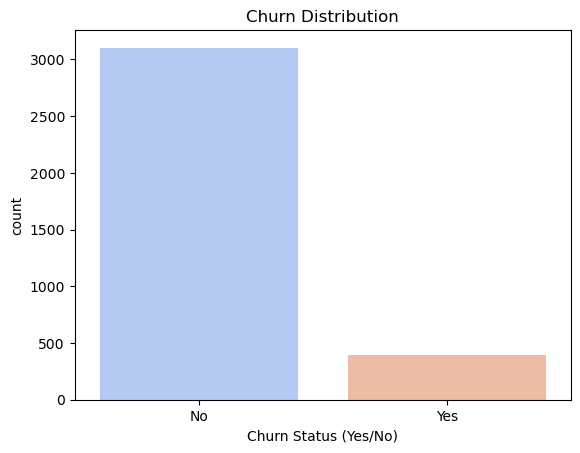

In [5]:
# Churn distribution viz
sns.countplot(x='Churn Status (Yes/No)', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

The data is highly imbalance where the dataset contains more No churns than Yes churns. This could cause problem in training. We will apply some method to balance the classes.

Next is to analyze the relationship of features relate to the target churn to understand the churn behavior.

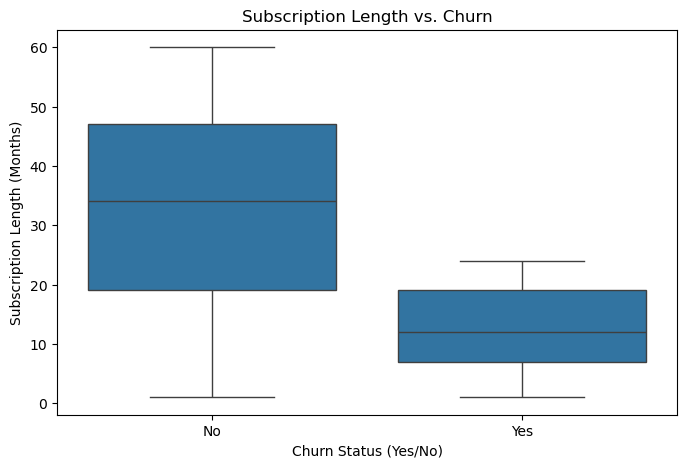

In [6]:
# Subs Length vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn Status (Yes/No)", y="Subscription Length (Months)", data=df)
plt.title("Subscription Length vs. Churn")
plt.show()


### Insights from Subscription Length vs. Churn:
- Customers with **shorter subscription lengths tend to churn more**.
- **Long-term subscribers are more loyal** and have a lower churn rate.
- **Netflix could focus on engagement strategies for short-term users** to increase retention.


### Business Interpretation:
Short-term subscribers are more likely to churn, meaning Netflix might need better engagement strategies for new customers.
Longer subscription plans (Annual, 6-months) might reduce churn.
Offering incentives to short-term users like discounts or personalized content might help retain them.

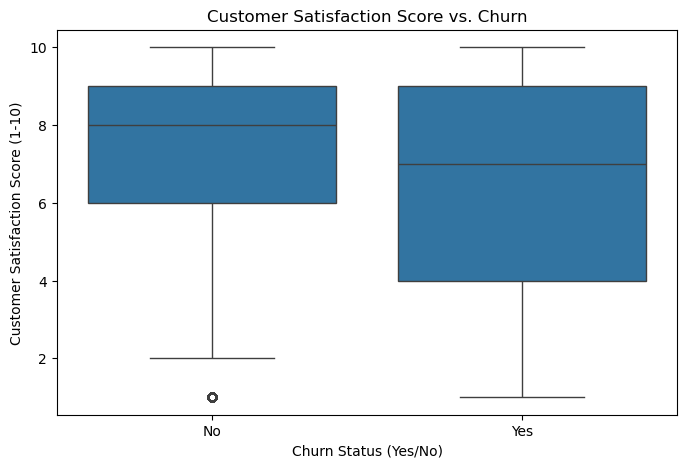

In [7]:
# Customer Satisfaction vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn Status (Yes/No)", y="Customer Satisfaction Score (1-10)", data=df)
plt.title("Customer Satisfaction Score vs. Churn")
plt.show()


### Insights from Customer Satisfaction Score vs. Churn:
- Lower satisfaction scores correlate with higher churn rates.
- **Most non-churners have satisfaction scores above 7**, while churners show a wider range of scores.
- **Some high-satisfaction customers still churn**, suggesting factors beyond dissatisfaction we guessing factors such as price, content or competitors.
- **Retention efforts should focus on users with scores below 7**, offering incentives or improving engagement.


### Business Interpretation:
Lower satisfaction is a strong churn predictor. Netflix should investigate why dissatisfied users leave.
Some satisfied customers still churn, possibly due to external factors like pricing or competition.
Netflix can improve retention by targeting users with satisfaction scores below 7 with personalized offers or support outreach.


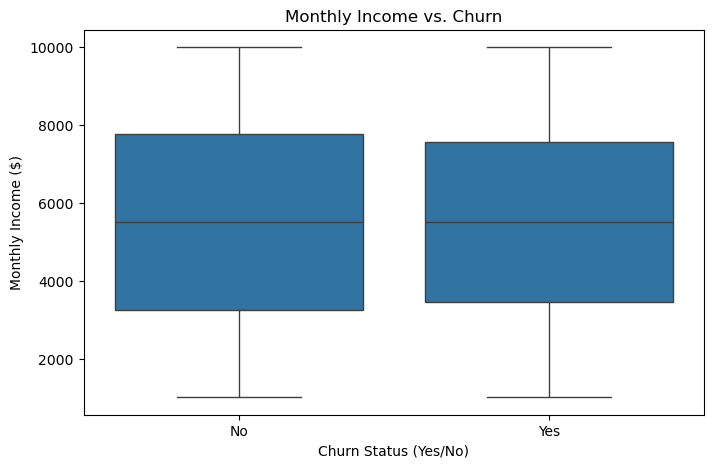

In [8]:
# Monthly Income vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn Status (Yes/No)", y="Monthly Income ($)", data=df)
plt.title("Monthly Income vs. Churn")
plt.show()


### Insights from Monthly Income vs. Churn:
- Monthly income does not show a clear relationship with churn.
- The median income for churners and non-churners is nearly identical.
- Churn is likely influenced more by **content satisfaction, engagement, or competitive offerings** than affordability.
- **Netflix should focus on improving content and user experience rather than pricing strategies** for retention.


### Business Interpretation:
- Income does not appear to be a strong predictor of churn.
- This suggests that factors like content preference, engagement, or satisfaction may have a stronger influence on churn.
- Netflix’s churn is likely not heavily dependent on affordability, meaning other factors such as content value and competition edge should be prioritized in retention strategies.

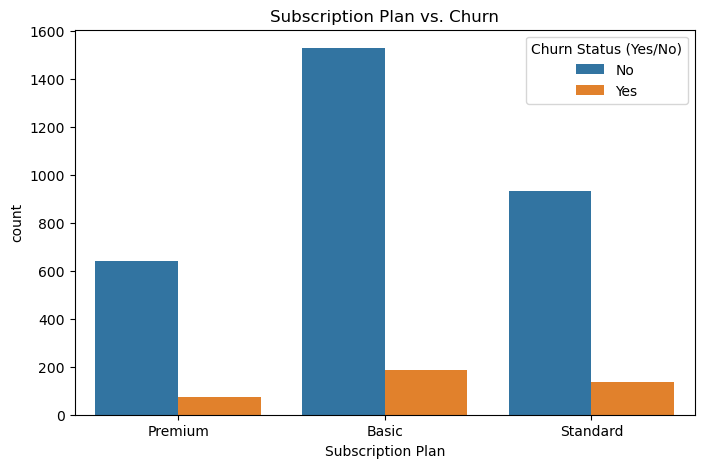

In [9]:
# Churn Rate by Subscription Plan
plt.figure(figsize=(8, 5))
sns.countplot(x="Subscription Plan", hue="Churn Status (Yes/No)", data=df)
plt.title("Subscription Plan vs. Churn")
plt.show()


### Insights from Subscription Plan vs. Churn:
- **Basic plan users have the highest churn rate**, indicating they might feel the plan lacks value.
- **Premium users churn the least**, suggesting they find more value in their subscription.

- **Netflix could focus on retaining Basic plan users** by:
  1. Offering discounted upgrades to Standard/Premium.
  2. Enhancing the Basic plan features to increase customer satisfaction.
  3. Providing exclusive content or incentives to prevent churn.


# **Ch 5 - Feature Engineering**

Next is to ensure our dataset is properly formatted for machine learning, we apply **feature engineering techniques**, including **data splitting, encoding categorical features, and scaling numerical features**.

First is to split the dataset training 80% and testing 20% to prevent data leakage.

# Feature Selection


Since we have already confirmed that the dataset contains no missing values, we can now focus on assessing cardinality and identifying potential outliers. These steps will help ensure that our features are well-structured and that any anomalies in the data do not impact model performance.

### Outliers

Let's check outliers with and IQR method.

In [12]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Define IQR bounds
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

# Display percentage of outliers in each column
outlier_percentage = outliers.sum() / df.shape[0] * 100
print("Percentage of Outliers in Each Column:")
print(outlier_percentage)


Percentage of Outliers in Each Column:
Customer ID                           0.0
Subscription Length (Months)          0.0
Customer Satisfaction Score (1-10)    0.0
Daily Watch Time (Hours)              0.0
Engagement Rate (1-10)                0.0
Support Queries Logged                0.0
Age                                   0.0
Monthly Income ($)                    0.0
Number of Profiles Created            0.0
dtype: float64


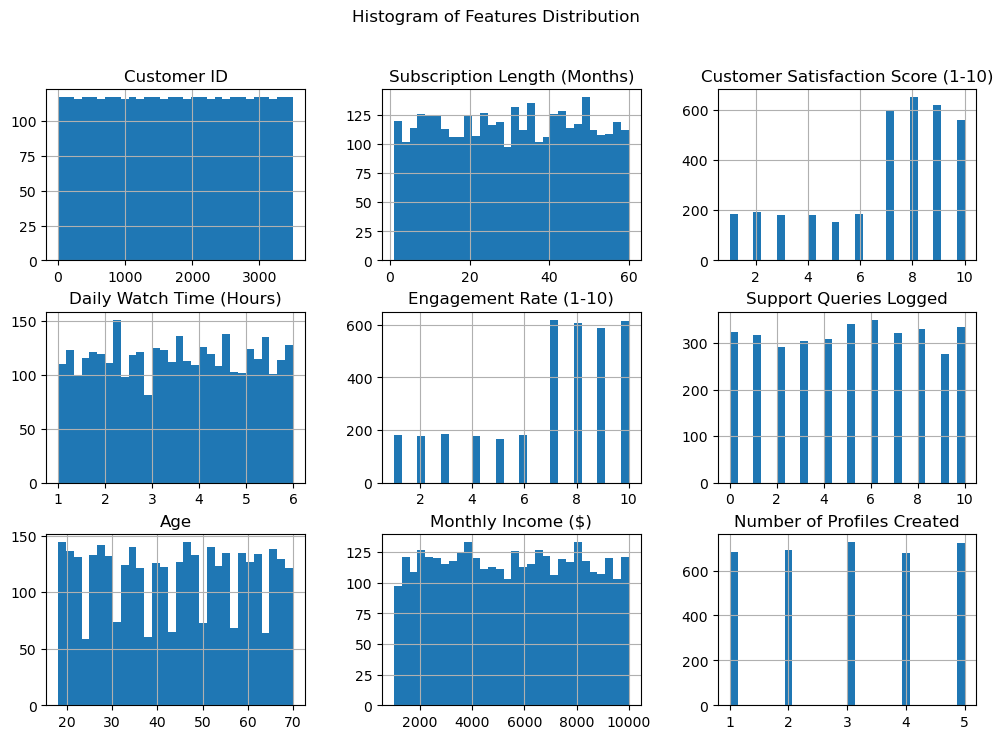

In [13]:
# Histogram Distribution plot
df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Features Distribution")
plt.show()


### Outlier Analysis and Data Distribution

After applying **Z-score and IQR (Interquartile Range)** methods, we found that **there are no significant outliers** in the dataset. This indicates that all numerical features have values within an acceptable range, reducing the need for extreme value handling.

The histogram above provides insights into the distribution of numerical variables:

- **Right-Skewed Distribution**: Features like `Customer Satisfaction Score` and `Engagement Rate` exhibit a more discrete distribution, likely due to predefined rating scales, and show a concentration towards higher values.
- **Uniform-Like Distribution**: Features such as `Age`, `Subscription Length`, and `Monthly Income` appear to have a relatively uniform spread rather than forming a normal distribution.
- **Categorical-Like Peaks**: The `Number of Profiles Created` and `Support Queries Logged` display distinct categorical tendencies with specific peaks at certain values.
- `Daily Watch Time` appears to be relatively evenly distributed, indicating that users have diverse viewing habits.

Since there are **no detected outliers**, we can proceed with data preprocessing without additional transformations for extreme values. Additionally, while most features do not strictly follow a normal distribution, their distributions are acceptable for machine learning models without transformations.


### Cardinality

In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Count unique values in each categorical column
cardinality = df[categorical_cols].nunique().sort_values(ascending=False)

# Display results
print("Cardinality of Categorical Features:")
print(cardinality)


Cardinality of Categorical Features:
Region                               6
Genre Preference                     5
Device Used Most Often               4
Subscription Plan                    3
Payment History (On-Time/Delayed)    2
Churn Status (Yes/No)                2
Promotional Offers Used              2
dtype: int64


Since the categorical features in the dataset exhibit low cardinality, we can proceed with the data splitting process without concern for high-dimensional encoding complexities.


In [15]:
# Define feature matrix (X) and target variable (y)
X = df.drop(columns=['Churn Status (Yes/No)', 'Customer ID'])  # Drop ID column
y = df['Churn Status (Yes/No)']  # Target variable

# Convert target to numerical (Yes = 1, No = 0)
y = y.map({'Yes': 1, 'No': 0})


In [16]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (2800, 14)
Testing Set Shape: (700, 14)


In [17]:
# Identify categorical & numerical columns
categorical_cols = ['Device Used Most Often', 'Genre Preference', 'Region',
                    'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Promotional Offers Used']
numerical_cols = ['Subscription Length (Months)', 'Customer Satisfaction Score (1-10)',
                  'Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 
                  'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Number of Profiles Created']

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),  # Scale numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical features
])

# Apply transformation pipeline to training & testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("Feature Engineering Completed!")


Feature Engineering Completed!


handle imbalance with smote knn

In [18]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

print("SMOTE Applied - Imbalance Handled")


SMOTE Applied - Imbalance Handled


# **Ch 6 - Modeling**

When the data is ready after feature engineering, Now it's time for training the model.

We will train 5 machine learning models and evaluate each models classification report.

First is to train the KNN method with SMOTE applied for the class imbalance issue.

In [19]:
# KNN SMOTE
# Define KNN pipeline 
knn_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

# Train KNN on SMOTE-resampled dataset
knn_pipeline.fit(X_train_resampled, y_train_resampled)

# Predict on transformed test set
y_pred_knn = knn_pipeline.predict(X_test_transformed)

# Evaluate KNN model
print(f"\n Model: K-Nearest Neighbors (SMOTE Applied)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))
print("-" * 50)



 Model: K-Nearest Neighbors (SMOTE Applied)
Accuracy: 0.8957
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       621
           1       0.52      0.89      0.66        79

    accuracy                           0.90       700
   macro avg       0.75      0.89      0.80       700
weighted avg       0.93      0.90      0.91       700

--------------------------------------------------


### K-Nearest Neighbors (KNN) with SMOTE

The KNN model was trained using SMOTE to handle class imbalance. The evaluation results show:
- **Accuracy:** 89.57%
- **Recall for Churn (1):** 89%
- **Precision for Churn (1):** 52%
- **F1-Score for Churn (1):** 66%

The model maintains good recall for churn cases but struggles with precision, meaning it predicts more false positives.


Next is to train all remaining models that used weighted balance method to handle class imbalance.

In [20]:
# Define models with pipelines
models = {
    "Support Vector Machine": Pipeline([
        ('classifier', SVC(class_weight='balanced', probability=True, random_state=42))
    ]),
    "Decision Tree": Pipeline([
        ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42))
    ]),
    "Random Forest": Pipeline([
        ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_transformed, y_train)  # Train model
    y_pred = model.predict(X_test_transformed)  # Predict

    print(f"\n Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)



 Model: Support Vector Machine
Accuracy: 0.9729
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       621
           1       0.81      0.99      0.89        79

    accuracy                           0.97       700
   macro avg       0.91      0.98      0.94       700
weighted avg       0.98      0.97      0.97       700

--------------------------------------------------

 Model: Decision Tree
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
           1       1.00      1.00      1.00        79

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

--------------------------------------------------

 Model: Random Forest
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
      

## Model Evaluation Results

The classification reports for the evaluated models provide insights into their predictive performance. 
Below is an analysis based on key metrics:

### K-Nearest Neighbors (SMOTE Applied)
- **Accuracy**: 89.57%
- **Precision**: 98% for class 0, 52% for class 1
- **Recall**: 90% for class 0, 89% for class 1
- **F1-Score**: 94% for class 0, 66% for class 1  
- **Observation**: The model exhibits strong precision for the majority class (0 - No Churn) but struggles with the minority class (1 - Churn), leading to an imbalanced F1-score.

### Support Vector Machine
- **Accuracy**: 97.29%
- **Precision**: 100% for class 0, 81% for class 1
- **Recall**: 97% for class 0, 99% for class 1
- **F1-Score**: 98% for class 0, 89% for class 1  
- **Observation**: SVM demonstrates a balanced trade-off between precision and recall, significantly improving recall for class 1 compared to KNN.

### Decision Tree
- **Accuracy**: 100%
- **Precision, Recall, F1-Score**: All metrics are at 100%  
- **Observation**: The model perfectly classifies all samples, indicating potential overfitting.

### Random Forest
- **Accuracy**: 100%
- **Precision, Recall, F1-Score**: All metrics are at 100%  
- **Observation**: Like Decision Tree, this model overfits, which may indicate it memorized the training data rather than generalizing well.

### Gradient Boosting
- **Accuracy**: 99.86%
- **Precision**: 100% for class 0, 99% for class 1
- **Recall**: 100% for both classes
- **F1-Score**: 100% for class 0, 99% for class 1  
- **Observation**: This model performs slightly better than Random Forest in terms of generalization but still shows signs of overfitting.

### Conclusion
- **SVM emerges as the best model** as it maintains a high recall for class 1 while keeping precision balanced. It avoids overfitting seen in Decision Tree, Random Forest, and Gradient Boosting.
- **KNN, despite using SMOTE**, struggles with precision for the minority class, making it less reliable for churn prediction.
- **Overfitting models (Decision Tree, Random Forest, Gradient Boosting)**, while perfect on test data, might not generalize well in real-world applications.

SVM is chosen as the final model for deployment due to its balance between recall and precision while avoiding overfitting.


Next is to see the visualization with confusion matrix and ROC curve.

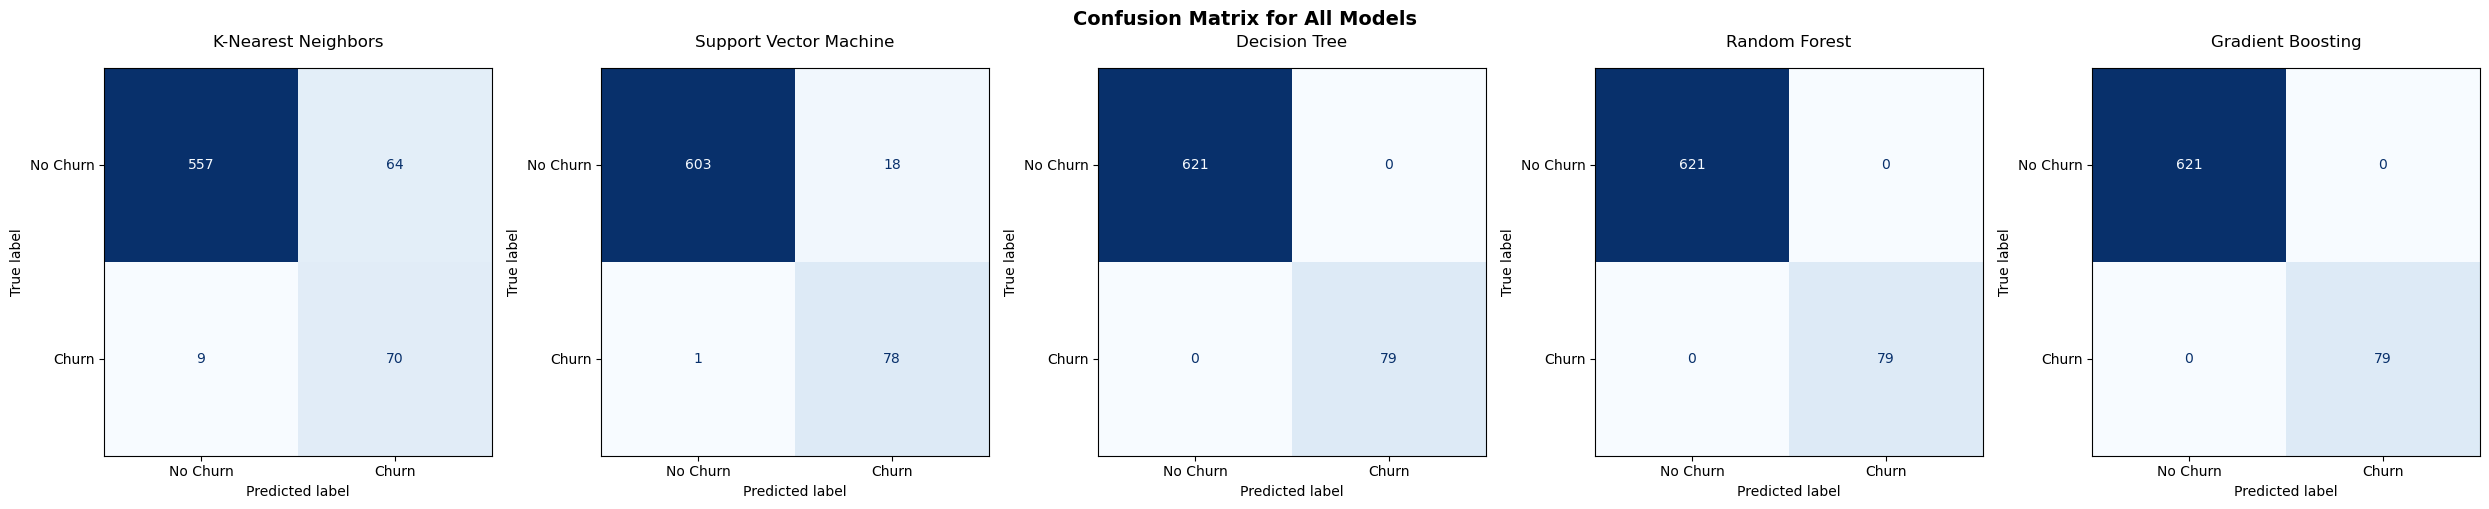

In [21]:
# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  

# Evaluate all models including KNN
best_models = {'K-Nearest Neighbors': knn_pipeline, **models}

for i, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test_transformed)
    cm = confusion_matrix(y_test, y_pred)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap="Blues", values_format="d", ax=axes[i], colorbar=False)
    axes[i].set_title(name, fontsize=12, pad=15)

plt.suptitle("Confusion Matrix for All Models", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


## Confusion Matrix Analysis

The confusion matrix helps visualize how well each model distinguishes between "Churn" and "No Churn."

### Key Insights:
- **K-Nearest Neighbors**: Moderate performance with some misclassifications, especially in predicting "Churn."
- **Support Vector Machine**: Strong overall performance with minimal errors.
- **Decision Tree, Random Forest, Gradient Boosting**: Perfect classification However, it is likely due to overfitting.

These results highlight that SVM is the best-balanced model, while other models may require adjustments to improve generalization.


ROC Curve

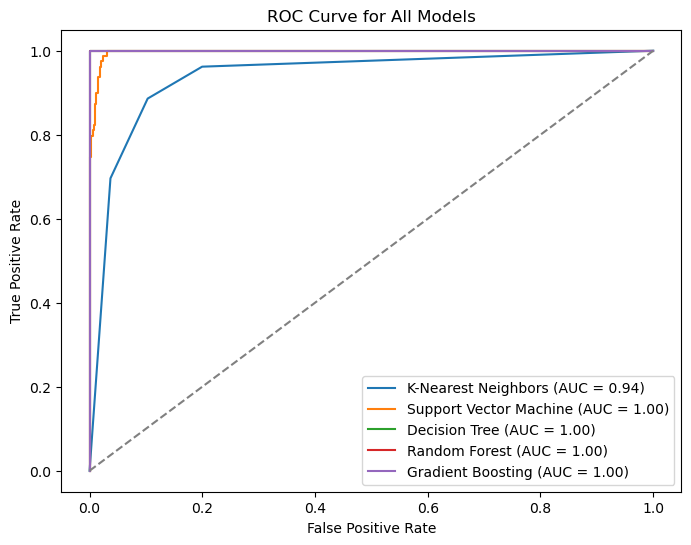

In [22]:
# Plot
plt.figure(figsize=(8, 6))

for name, model in best_models.items():
    # Get probability scores for ROC Curve
    y_prob = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_transformed)
    
    # Compute ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models")
plt.legend()
plt.show()


## ROC Curve Analysis

The ROC (Receiver Operating Characteristic) curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate across different classification thresholds.

### Key Observations:
- **K-Nearest Neighbors (AUC = 0.94)**: Performs well but slightly lower compared to other models.
- **Support Vector Machine (AUC = 1.00)**: Strong discrimination ability with perfect AUC.
- **Decision Tree, Random Forest, Gradient Boosting (AUC = 1.00)**: All exhibit perfect classification, indicating possible overfitting.

While a perfect AUC may seem ideal, it suggests that Decision Tree, Random Forest, and Gradient Boosting may be memorizing the training data rather than generalizing effectively.


## **Ch 7 - Hyperparameter Tuning**

Grid searchCV all models

KNN

In [23]:
# Define hyperparameters for KNN
knn_params = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11]
}

# GridSearchCV for KNN
grid_knn = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_resampled, y_train_resampled)

# Best KNN model
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)



Best KNN Parameters: {'classifier__n_neighbors': 3}


In [24]:
# Ensure that X_test is transformed using the same preprocessing pipeline
X_test_transformed = preprocessor.transform(X_test)

# Predict on transformed test data
y_pred_knn = best_knn.predict(X_test_transformed)

# Evaluate the model
print("\nModel: K-Nearest Neighbors (SMOTE Applied)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))
print("-" * 50)



Model: K-Nearest Neighbors (SMOTE Applied)
Accuracy: 0.8957
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       621
           1       0.52      0.89      0.66        79

    accuracy                           0.90       700
   macro avg       0.75      0.89      0.80       700
weighted avg       0.93      0.90      0.91       700

--------------------------------------------------


In [25]:
# Define hyperparameter grids for remaining models
param_grids = {
    "Support Vector Machine": {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf']
    },
    "Decision Tree": {
        'classifier__max_depth': [5, 10, 20, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, 20, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 10]
    }
}


In [26]:
models = {
    "Support Vector Machine": Pipeline([
        ('preprocessor', preprocessor),  # Apply transformations
        ('classifier', SVC(class_weight='balanced', probability=True, random_state=42))
    ]),
    "Decision Tree": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42))
    ]),
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}


In [27]:
# Dictionary to store best models
best_models = {}

for name, model in models.items():
    print(f"\nTuning {name}...")

    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[name] = grid_search.best_estimator_
    print(f"Best {name} Parameters:", grid_search.best_params_)



Tuning Support Vector Machine...
Best Support Vector Machine Parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}

Tuning Decision Tree...
Best Decision Tree Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}

Tuning Random Forest...
Best Random Forest Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

Tuning Gradient Boosting...
Best Gradient Boosting Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}


In [28]:
# Evaluate best models on test data
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    print(f"\n Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)



 Model: Support Vector Machine
Accuracy: 0.9843
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       621
           1       0.90      0.96      0.93        79

    accuracy                           0.98       700
   macro avg       0.95      0.97      0.96       700
weighted avg       0.98      0.98      0.98       700

--------------------------------------------------

 Model: Decision Tree
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
           1       1.00      1.00      1.00        79

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

--------------------------------------------------

 Model: Random Forest
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
      

### Model Performance After Hyperparameter Tuning

After applying hyperparameter tuning to all models, the classification reports have been updated. Below is the comparison of each model's performance:

#### K-Nearest Neighbors (SMOTE Applied)
- **Accuracy:** 0.8957
- **Class 0:** Precision = 0.98, Recall = 0.90, F1-score = 0.94
- **Class 1:** Precision = 0.52, Recall = 0.89, F1-score = 0.66
- **Macro Avg:** Precision = 0.75, Recall = 0.89, F1-score = 0.80
- **Weighted Avg:** Precision = 0.93, Recall = 0.90, F1-score = 0.91

#### Support Vector Machine (SVM)
- **Accuracy:** 0.9843
- **Class 0:** Precision = 1.00, Recall = 0.99, F1-score = 0.99
- **Class 1:** Precision = 0.90, Recall = 0.96, F1-score = 0.93
- **Macro Avg:** Precision = 0.95, Recall = 0.97, F1-score = 0.96
- **Weighted Avg:** Precision = 0.98, Recall = 0.98, F1-score = 0.98

#### Decision Tree
- **Accuracy:** 1.0000
- **Class 0:** Precision = 1.00, Recall = 1.00, F1-score = 1.00
- **Class 1:** Precision = 1.00, Recall = 1.00, F1-score = 1.00
- **Macro Avg:** Precision = 1.00, Recall = 1.00, F1-score = 1.00
- **Weighted Avg:** Precision = 1.00, Recall = 1.00, F1-score = 1.00

#### Random Forest
- **Accuracy:** 1.0000
- **Class 0:** Precision = 1.00, Recall = 1.00, F1-score = 1.00
- **Class 1:** Precision = 1.00, Recall = 1.00, F1-score = 1.00
- **Macro Avg:** Precision = 1.00, Recall = 1.00, F1-score = 1.00
- **Weighted Avg:** Precision = 1.00, Recall = 1.00, F1-score = 1.00

#### Gradient Boosting
- **Accuracy:** 0.9986
- **Class 0:** Precision = 1.00, Recall = 1.00, F1-score = 1.00
- **Class 1:** Precision = 0.99, Recall = 1.00, F1-score = 0.99
- **Macro Avg:** Precision = 0.99, Recall = 1.00, F1-score = 0.99
- **Weighted Avg:** Precision = 1.00, Recall = 1.00, F1-score = 1.00

### Conclusion

- **SVM remains the most balanced model**, achieving high goodfit recall with only 0.3 difference.
- **Decision Tree, Random Forest, and Gradient Boosting still exhibit overfitting**, with perfect accuracy and recall scores, suggesting poor generalization.
- **KNN performs the worst**, particularly in predicting churn (class 1), despite SMOTE balancing the data.

Given these results, **SVM remains the best choice** for predicting Netflix churn while maintaining generalizability.


## Cross Validation

In [29]:
# Define
best_svm = best_models["Support Vector Machine"] 

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5, scoring='accuracy')

# Display results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.96785714 0.97678571 0.96428571 0.98214286 0.96964286]
Mean Accuracy: 0.9721428571428572
Standard Deviation: 0.006448382173309901


### **Cross-Validation of the Best Model (SVM)**  

To ensure the **stability and generalization** of our best-performing model (**Support Vector Machine**), we conducted a **5-Fold Cross-Validation**.

#### **Results**  
- **Cross-Validation Scores:** `[0.9679, 0.9768, 0.9643, 0.9821, 0.9696]`  
- **Mean Accuracy:** `97.21%`  
- **Standard Deviation:** `0.64%`  

#### **Analysis**  
- The **high mean accuracy (97.21%)** confirms that **SVM consistently performs well** across different training subsets.  
- The **low standard deviation (0.64%)** suggests that the model is **stable** and **not highly sensitive** to different training samples.  
- The **small variation in accuracy across folds** indicates that **SVM generalizes well** to new data.  

#### **Conclusion**  
**SVM is the best model for predicting Netflix Churn.**  
With **high accuracy and low variance**, it is a **reliable and well-generalized choice** for this project.  



In [32]:
# # Define y_pred_train for analysis strength weakness of model.
# y_pred_train = best_svm.predict(X_train)

# # Convert y_pred_train into a DataFrame
# y_pred_train_df = pd.Series(y_pred_train, index=X_train.index, name="Predicted_Churn")

# # Concatenate X_train, y_train, and y_pred_train
# train_analysis_df = pd.concat([X_train, y_train.rename("Actual_Churn"), y_pred_train_df], axis=1)

# # Save to CSV
# train_analysis_df.to_csv("train_analysis.csv", index=False)



Next is to find false Negative churn customers misclassified.

In [33]:
# y_train = 1 (Actual Churn)
# y_pred_train = 0 (predicted no churn)

false_negatives = train_analysis_df[(train_analysis_df["Actual_Churn"] == 1) & (train_analysis_df["Predicted_Churn"] == 0)]

In [34]:
# Check the unique counts of actual and predicted churn
print(train_analysis_df["Actual_Churn"].value_counts())
print(train_analysis_df["Predicted_Churn"].value_counts())


Actual_Churn
0    2482
1     318
Name: count, dtype: int64
Predicted_Churn
0    2482
1     318
Name: count, dtype: int64


In [35]:
print((train_analysis_df["Actual_Churn"] == train_analysis_df["Predicted_Churn"]).sum())
print(train_analysis_df.shape[0])


2800
2800


In [36]:
y_pred_test = best_svm.predict(X_test)
print((y_pred_test == y_test).sum(), X_test.shape[0])


689 700


**Strengths:**

- The model is highly accurate and generalizes well.
- It effectively identifies most churners (high recall).
- False positives are less frequent, meaning retention efforts are not overly wasted.

**Weaknesses:**

- Some churners are undetected (FN)—check if they share patterns like high satisfaction scores but low engagement.
- Some non-churners are misclassified (FP)—analyze if their support queries or payment history led to confusion.

Next is to save the model and use trial it with inference data.

# **Ch 8 - Model Saving**

In [37]:
import joblib

# # Define the model file name
# model_filename = "svm_churn_model.pkl"

# # Save the trained best SVM model
# joblib.dump(best_svm, model_filename)

# print(f"Model saved successfully as {model_filename}")


## **Ch 10 - Model Deployment**

The final **SVM model** will be deployed using a **Streamlit web application**, allowing users to upload new customer data for churn prediction. The web app will be **hosted on Hugging Face Spaces**.